<a href="https://colab.research.google.com/github/falahamro/Moral-Foundations-Analysis/blob/main/Feature_Importance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Moral Foundations Application/Moral Foundations Theory Dataset/stats170_capstone_MFT_twitter_project-master/data/cleaned_scores_final.csv")

In [86]:
df.head()

,mtkid,Harm,Fairness,Loyalty,Authority,Purity,ICS_score,Political Involvement,Political Leaning
0,aA3L0DCUXU11,20,20,12,19,18,4,5,conservative
1,aA3I40B0FU11,18,25,23,17,5,7,8,conservative
2,aA2MCRVU8U11,14,23,14,19,19,9,1,conservative
3,aA1PJUYJ7U11,22,25,12,16,12,-6,5,slightly
4,aA1KZ21TSU11,26,27,16,22,28,1,3,slightly


In [87]:
df.shape

(406, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   mtkid                  406 non-null    object
 1   Harm                   406 non-null    int64 
 2   Fairness               406 non-null    int64 
 3   Loyalty                406 non-null    int64 
 4   Authority              406 non-null    int64 
 5   Purity                 406 non-null    int64 
 6   ICS_score              406 non-null    int64 
 7   Political Involvement  406 non-null    int64 
 8   Political Leaning      406 non-null    object
dtypes: int64(7), object(2)
memory usage: 28.7+ KB


In [89]:
df.drop('mtkid', axis=1, inplace = True)

In [90]:
df.drop('Political Involvement', axis=1, inplace = True)
df.drop('ICS_score', axis=1, inplace = True)

We define X and Y datasets

In [91]:
x = df.drop('Political Leaning', axis=1)

In [92]:
x.head()

,Harm,Fairness,Loyalty,Authority,Purity
0,20,20,12,19,18
1,18,25,23,17,5
2,14,23,14,19,19
3,22,25,12,16,12
4,26,27,16,22,28


In [93]:
df.isnull().sum()

Harm                 0
Fairness             0
Loyalty              0
Authority            0
Purity               0
Political Leaning    0
dtype: int64

In [94]:
y = df['Political Leaning']

In [95]:
# change categorical variables to numeric values

df['Political Leaning'].replace(['conservative', 'liberal', 'slightly', 'moderate'],
                                 [0, 1, 2, 3], inplace=True)

In [96]:
y

0      0
1      0
2      0
3      2
4      2
      ..
401    0
402    1
403    1
404    1
405    1
Name: Political Leaning, Length: 406, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.30, random_state= 1)

**Xgboost Built-in Feature Importance**

In [98]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(xtrain, ytrain)

[16:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [99]:
xgb.feature_importances_

array([0.16293731, 0.1533524 , 0.17160368, 0.23855045, 0.2735562 ],
      dtype=float32)

In [100]:
top = pd.Series(xgb.feature_importances_, index=x.columns)  

In [101]:
top

Harm         0.162937
Fairness     0.153352
Loyalty      0.171604
Authority    0.238550
Purity       0.273556
dtype: float32

In [102]:
top1= top.sort_values()
top1

Fairness     0.153352
Harm         0.162937
Loyalty      0.171604
Authority    0.238550
Purity       0.273556
dtype: float32

Text(0.5, 1.0, 'Importance of selected Features of Moral Foundations Theory')

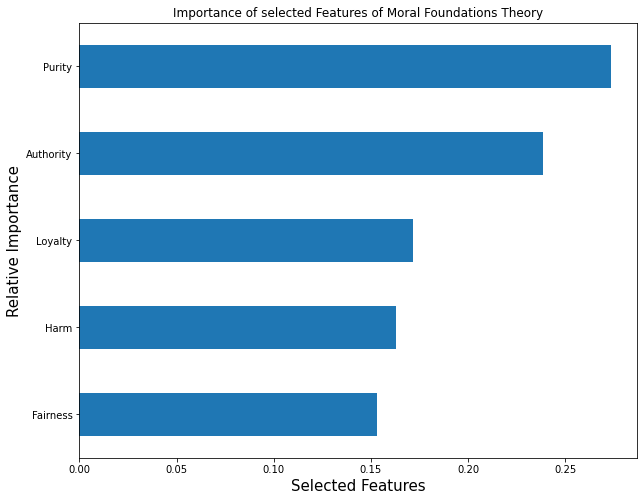

In [103]:
top1.plot(kind='barh',figsize=(10,8))
plt.xlabel("Selected Features", size=15)
plt.ylabel("Relative Importance", size=15)
plt.title('Importance of selected Features of Moral Foundations Theory')

Accuracy

In [104]:
xgb.score(xtest, ytest)

0.02525786235834926

Permutation Based Feature Importance


In [105]:
perm_importance = permutation_importance(xgb, xtest, ytest)

In [106]:
top2= top1.sort_values()
top2

Fairness     0.153352
Harm         0.162937
Loyalty      0.171604
Authority    0.238550
Purity       0.273556
dtype: float32

Text(0.5, 1.0, 'Relative importance of selected features')

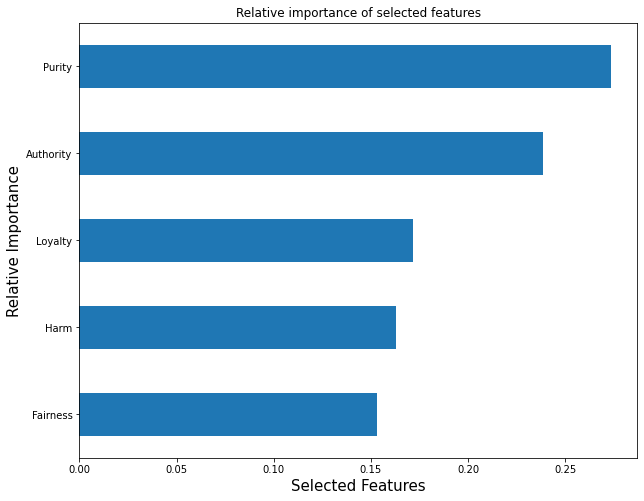

In [107]:
top2.plot(kind='barh',figsize=(10,8))
plt.xlabel("Selected Features", size=15)
plt.ylabel("Relative Importance", size=15)
plt.title('Relative importance of selected features')

In [108]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();

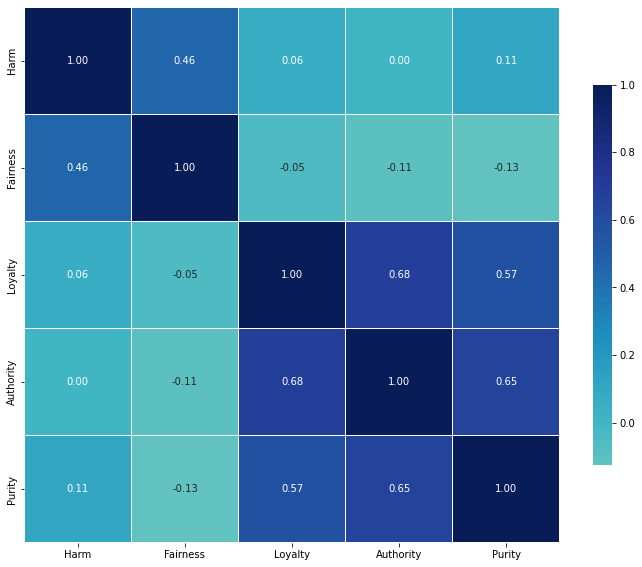

In [109]:
correlation_heatmap(xtrain)

In [111]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xtest)

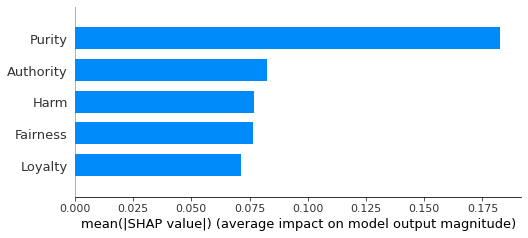

In [112]:
shap.summary_plot(shap_values, xtest, plot_type="bar")

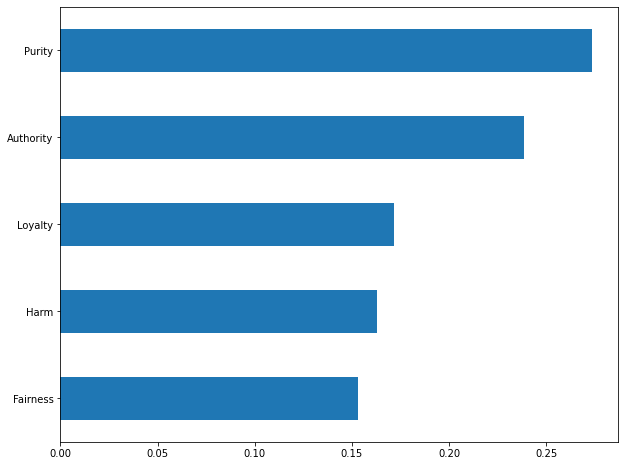

In [113]:
top2.plot(kind='barh',figsize=(10,8))

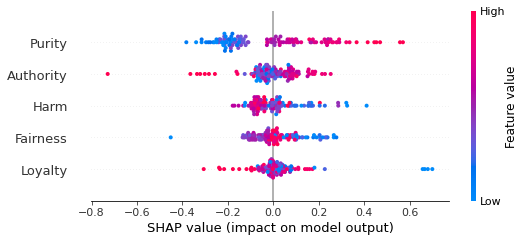

In [114]:
shap.summary_plot(shap_values, xtest)

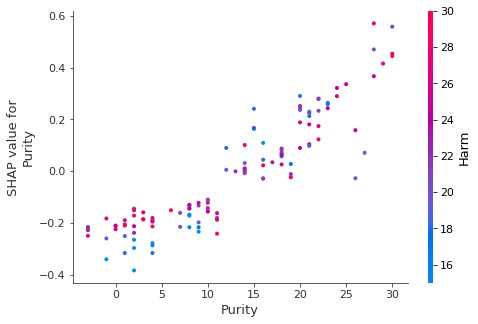

In [115]:
shap.dependence_plot("Purity", shap_values, xtest)

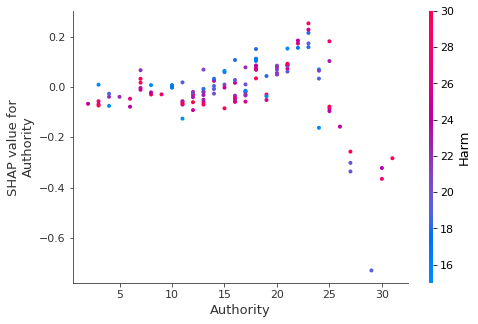

In [116]:
shap.dependence_plot("Authority", shap_values, xtest)

Random Forest Regression Feature Importance

In [117]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [118]:
model = RandomForestRegressor()

In [119]:
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [120]:
importance = model.feature_importances_

In [121]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.20867
Feature: 1, Score: 0.16875
Feature: 2, Score: 0.18811
Feature: 3, Score: 0.20403
Feature: 4, Score: 0.23044


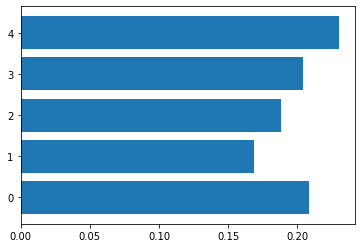

In [122]:
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

Accuracy

In [123]:
model.score(xtest, ytest)

0.04268159140335159

**Boosted regression trees**

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
gbr = GradientBoostingRegressor()

In [126]:
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [127]:
gbr.feature_importances_

array([0.17442108, 0.10777947, 0.18383806, 0.26317072, 0.27079067])

In [128]:
top3 = pd.Series(gbr.feature_importances_, index=x.columns) 

In [129]:
top3

Harm         0.174421
Fairness     0.107779
Loyalty      0.183838
Authority    0.263171
Purity       0.270791
dtype: float64

In [130]:
top4= top3.sort_values()
top4

Fairness     0.107779
Harm         0.174421
Loyalty      0.183838
Authority    0.263171
Purity       0.270791
dtype: float64

Text(0.5, 1.0, 'Relative importance of selected 5 features')

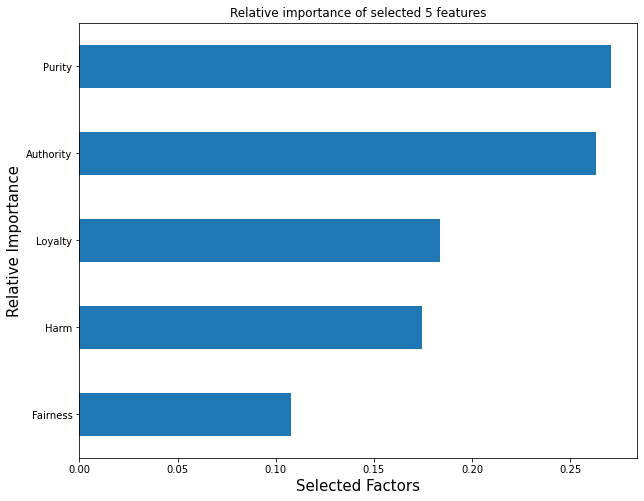

In [131]:
top4.plot(kind='barh',figsize=(10,8))
plt.xlabel("Selected Factors", size=15)
plt.ylabel("Relative Importance", size=15)
plt.title('Relative importance of selected 5 features')

Accuracy

In [132]:
gbr.score(xtest, ytest)

0.07415839794777479